In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
data = pd.read_csv('/content/drive/MyDrive/datasets/diabetes.csv')

In [30]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes_df_copy = data
data = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [ ]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

In [ ]:
print(diabetes_df_copy.isnull().sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


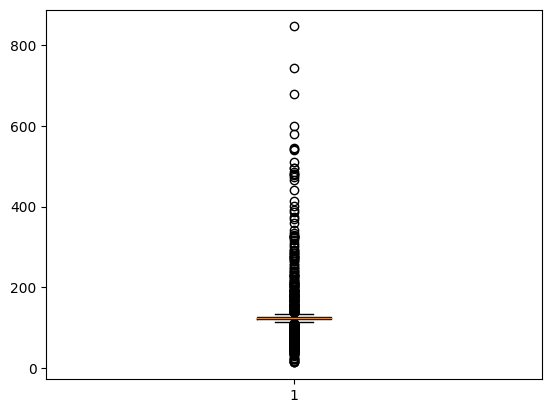

In [ ]:
plt.boxplot(diabetes_df_copy['Insulin'])
plt.show()

#scaling

In [70]:
#STANDARD SCALING
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x.loc[:, ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = sc.fit_transform(x[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

In [71]:
x = data.drop(['Outcome'],axis = 1)
y =data.Outcome

#Traintestsplit

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state = 42)

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
clf = DecisionTreeClassifier(criterion='entropy')

In [75]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [76]:
y_pred = clf.predict(x_test)

In [77]:
y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0])

In [78]:
from sklearn import metrics

In [79]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.703125


#randomforest

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state = 42)

In [81]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 500, random_state = 42)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [82]:
y_pred = clf.predict(x_test)

In [83]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7447916666666666


Adaboost

In [84]:
from sklearn.ensemble import AdaBoostClassifier
ad_clf = AdaBoostClassifier(n_estimators = 10)
ad_clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10)

In [85]:
y_pred = ad_clf.predict(x_test)

In [86]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7447916666666666


#Knn


In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state = 42)

In [88]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors =k, metric = 'minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [91]:
metric_k

[0.640625,
 0.6927083333333334,
 0.65625,
 0.6927083333333334,
 0.6822916666666666,
 0.7083333333333334,
 0.7135416666666666,
 0.71875,
 0.6927083333333334,
 0.7447916666666666,
 0.7395833333333334,
 0.734375]

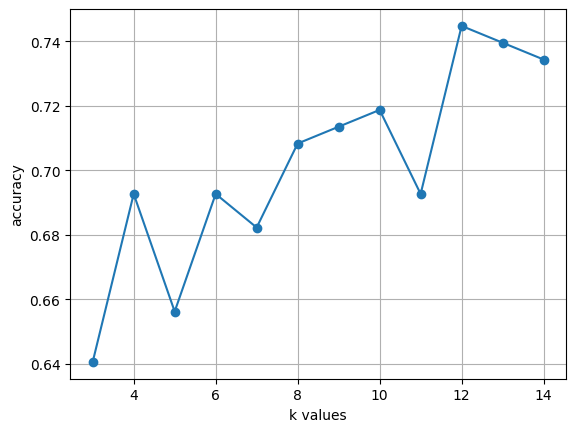

In [92]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.grid()

In [93]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski',p = 2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [94]:
y_pred_knn = classifier.predict(x_test)

In [95]:
accuracy_score(y_pred_knn,y_test)

0.6822916666666666